# **EKSPERIMEN MACHINE LEARNING - HOUSE PRICES PREDICTION**

**Author:** Anwar Rohmadi  
**Dataset:** House Prices - Advanced Regression Techniques (Kaggle)  
**Task:** Regression (Prediksi Harga Rumah)  
**Date:** 2024

---

# **1. Perkenalan Dataset**

## 1.1 Sumber Dataset
Dataset ini berasal dari kompetisi Kaggle **"House Prices - Advanced Regression Techniques"**.

**URL:** https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

## 1.2 Deskripsi Dataset
Dataset berisi **79 variabel** yang menjelaskan berbagai aspek rumah residensial di Ames, Iowa. Target variabel adalah **SalePrice** (harga jual rumah dalam USD).

## 1.3 Karakteristik Dataset
| Aspek | Detail |
|-------|--------|
| Jumlah Sampel (Train) | 1,460 |
| Jumlah Sampel (Test) | 1,459 |
| Jumlah Fitur | 79 |
| Target | SalePrice (Continuous) |
| Task Type | Regression |
| Missing Values | Ada (beberapa kolom) |
| Tipe Data | Numerik + Kategorikal |

# **2. Import Library**

In [1]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Utilities
import os
import json
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', 100)
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 1.26.4


# **3. Memuat Dataset**

In [2]:
# Konfigurasi
RAW_DIR = "../house_prices_raw"
PROCESSED_DIR = "../house_prices_preprocessing"
TARGET_COL = "SalePrice"
ID_COL = "Id"

# Load dataset
train_df = pd.read_csv(f"{RAW_DIR}/train.csv")
test_df = pd.read_csv(f"{RAW_DIR}/test.csv")

print(f"Train dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")
print(f"\nTarget column: {TARGET_COL}")

Train dataset shape: (1460, 81)
Test dataset shape: (1459, 80)

Target column: SalePrice


In [3]:
# Preview data
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Info dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# **4. Exploratory Data Analysis (EDA)**

## 4.1 Statistik Deskriptif

In [5]:
# Statistik deskriptif numerik
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
# Statistik target variable
print("=" * 50)
print("STATISTIK TARGET (SalePrice)")
print("=" * 50)
print(f"Mean: ${train_df[TARGET_COL].mean():,.2f}")
print(f"Median: ${train_df[TARGET_COL].median():,.2f}")
print(f"Std: ${train_df[TARGET_COL].std():,.2f}")
print(f"Min: ${train_df[TARGET_COL].min():,.2f}")
print(f"Max: ${train_df[TARGET_COL].max():,.2f}")
print(f"Skewness: {train_df[TARGET_COL].skew():.4f}")
print(f"Kurtosis: {train_df[TARGET_COL].kurtosis():.4f}")

STATISTIK TARGET (SalePrice)
Mean: $180,921.20
Median: $163,000.00
Std: $79,442.50
Min: $34,900.00
Max: $755,000.00
Skewness: 1.8829
Kurtosis: 6.5363


## 4.2 Distribusi Target Variable

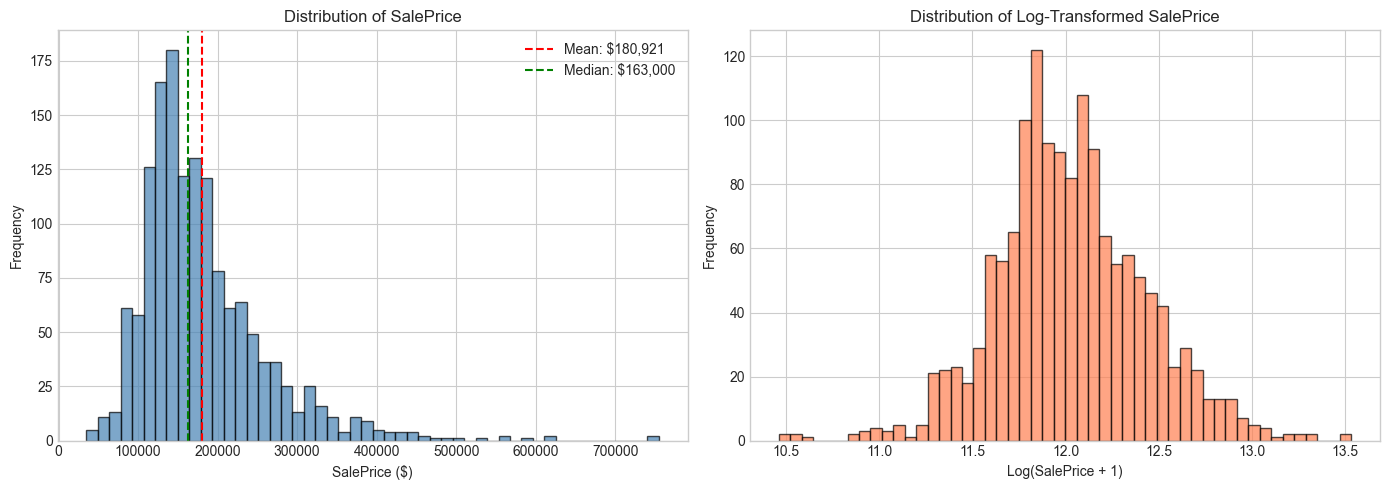


📊 Insight: Target variable menunjukkan right-skewed distribution.
   Log transformation dapat membantu menormalkan distribusi.


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train_df[TARGET_COL], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('SalePrice ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SalePrice')
axes[0].axvline(train_df[TARGET_COL].mean(), color='red', linestyle='--', label=f'Mean: ${train_df[TARGET_COL].mean():,.0f}')
axes[0].axvline(train_df[TARGET_COL].median(), color='green', linestyle='--', label=f'Median: ${train_df[TARGET_COL].median():,.0f}')
axes[0].legend()

# Log-transformed
axes[1].hist(np.log1p(train_df[TARGET_COL]), bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Log(SalePrice + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Log-Transformed SalePrice')

plt.tight_layout()
plt.savefig('target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n📊 Insight: Target variable menunjukkan right-skewed distribution.")
print("   Log transformation dapat membantu menormalkan distribusi.")

## 4.3 Analisis Missing Values

In [8]:
# Hitung missing values
missing = train_df.isnull().sum()
missing_pct = (missing / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
}).sort_values('Missing %', ascending=False)

# Filter kolom dengan missing values
missing_df = missing_df[missing_df['Missing Count'] > 0]

print(f"Jumlah kolom dengan missing values: {len(missing_df)}")
print("\nTop 10 kolom dengan missing values terbanyak:")
missing_df.head(10)

Jumlah kolom dengan missing values: 19

Top 10 kolom dengan missing values terbanyak:


,Missing Count,Missing %
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945


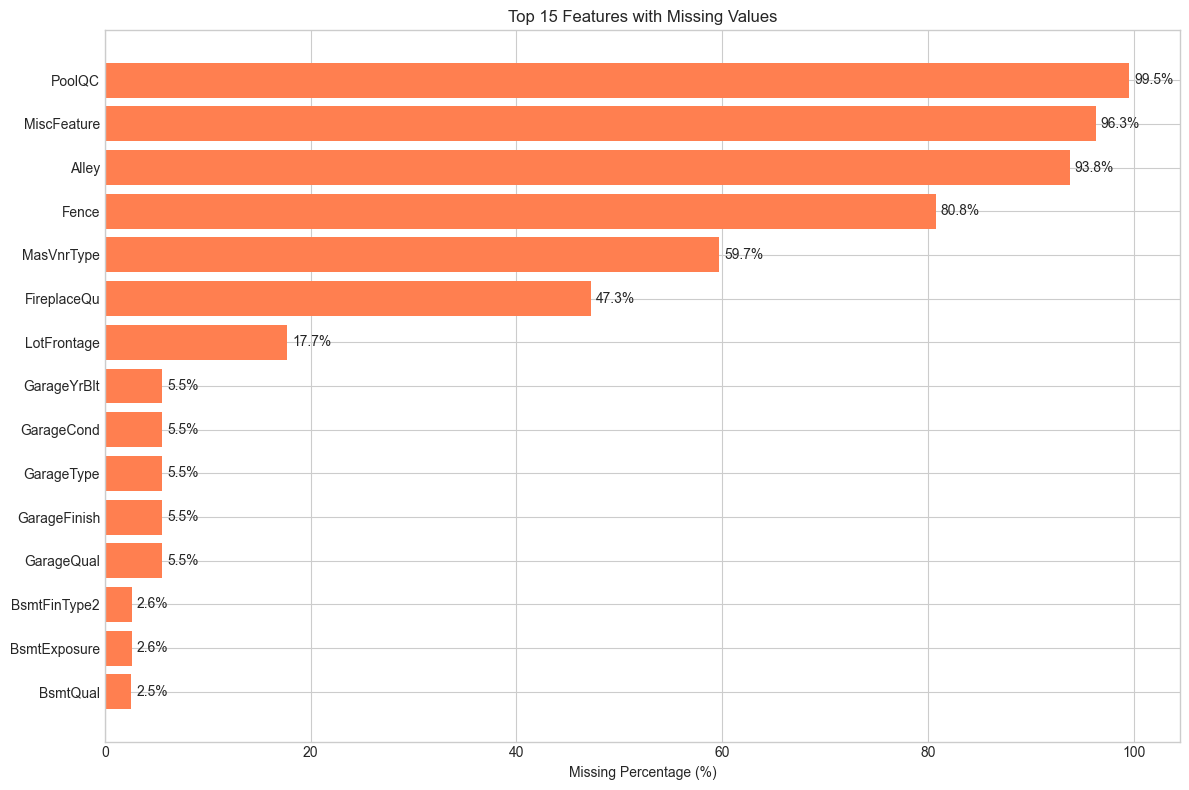

In [9]:
# Visualisasi missing values
plt.figure(figsize=(12, 8))
top_missing = missing_df.head(15)
plt.barh(top_missing.index, top_missing['Missing %'], color='coral')
plt.xlabel('Missing Percentage (%)')
plt.title('Top 15 Features with Missing Values')
plt.gca().invert_yaxis()
for i, v in enumerate(top_missing['Missing %']):
    plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
plt.tight_layout()
plt.savefig('missing_values.png', dpi=150, bbox_inches='tight')
plt.show()

## 4.4 Korelasi Fitur Numerik

In [10]:
# Hitung korelasi dengan target
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
correlations = train_df[numeric_cols].corr()[TARGET_COL].drop(TARGET_COL).sort_values(ascending=False)

print("Top 10 fitur berkorelasi POSITIF dengan SalePrice:")
print(correlations.head(10))
print("\nTop 10 fitur berkorelasi NEGATIF dengan SalePrice:")
print(correlations.tail(10))

Top 10 fitur berkorelasi POSITIF dengan SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

Top 10 fitur berkorelasi NEGATIF dengan SalePrice:
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


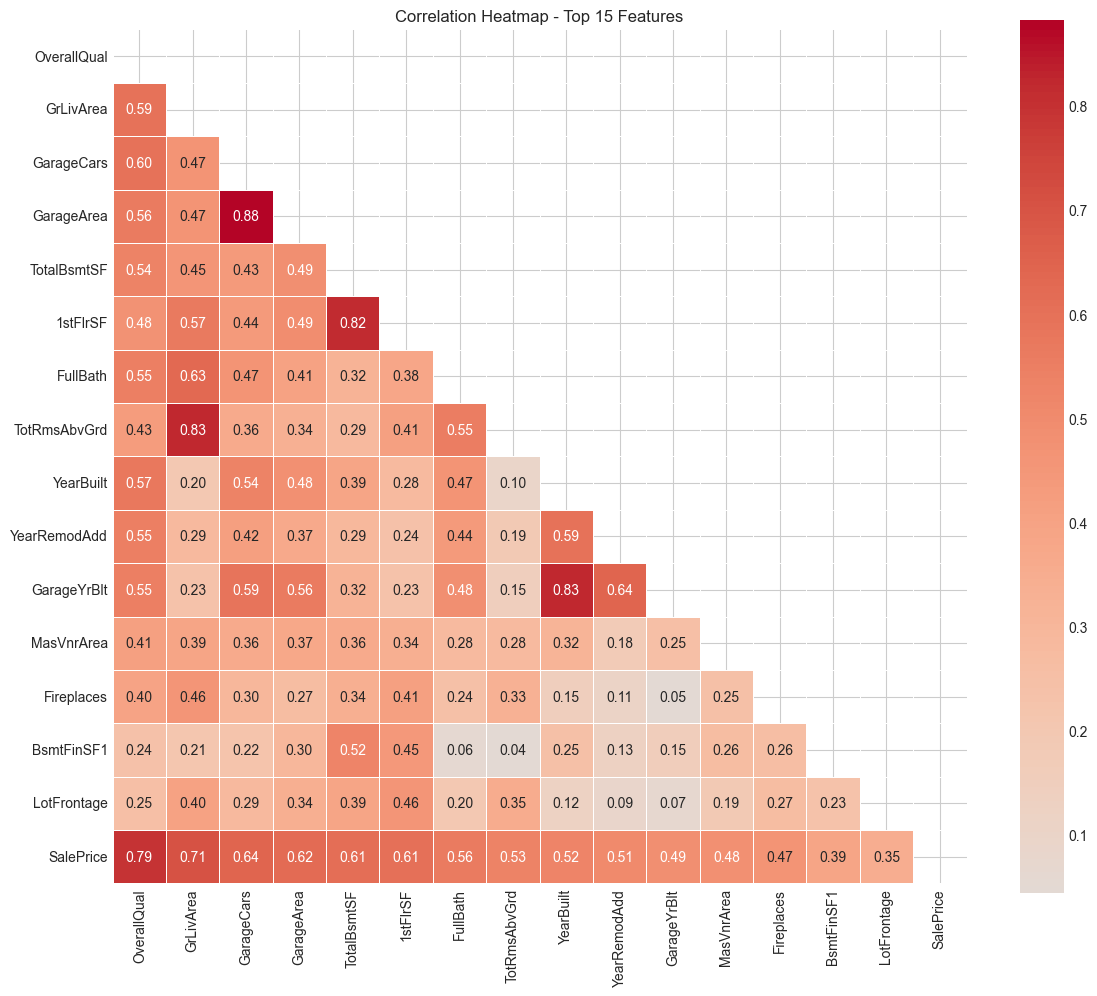

In [11]:
# Heatmap korelasi top features
top_corr_features = correlations.abs().nlargest(15).index.tolist()
top_corr_features.append(TARGET_COL)

plt.figure(figsize=(12, 10))
corr_matrix = train_df[top_corr_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Heatmap - Top 15 Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()

## 4.5 Analisis Fitur Kategorikal

In [12]:
# Identifikasi kolom kategorikal
cat_cols = train_df.select_dtypes(include=['object']).columns
print(f"Jumlah fitur kategorikal: {len(cat_cols)}")
print(f"\nFitur kategorikal: {list(cat_cols)}")

Jumlah fitur kategorikal: 43

Fitur kategorikal: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


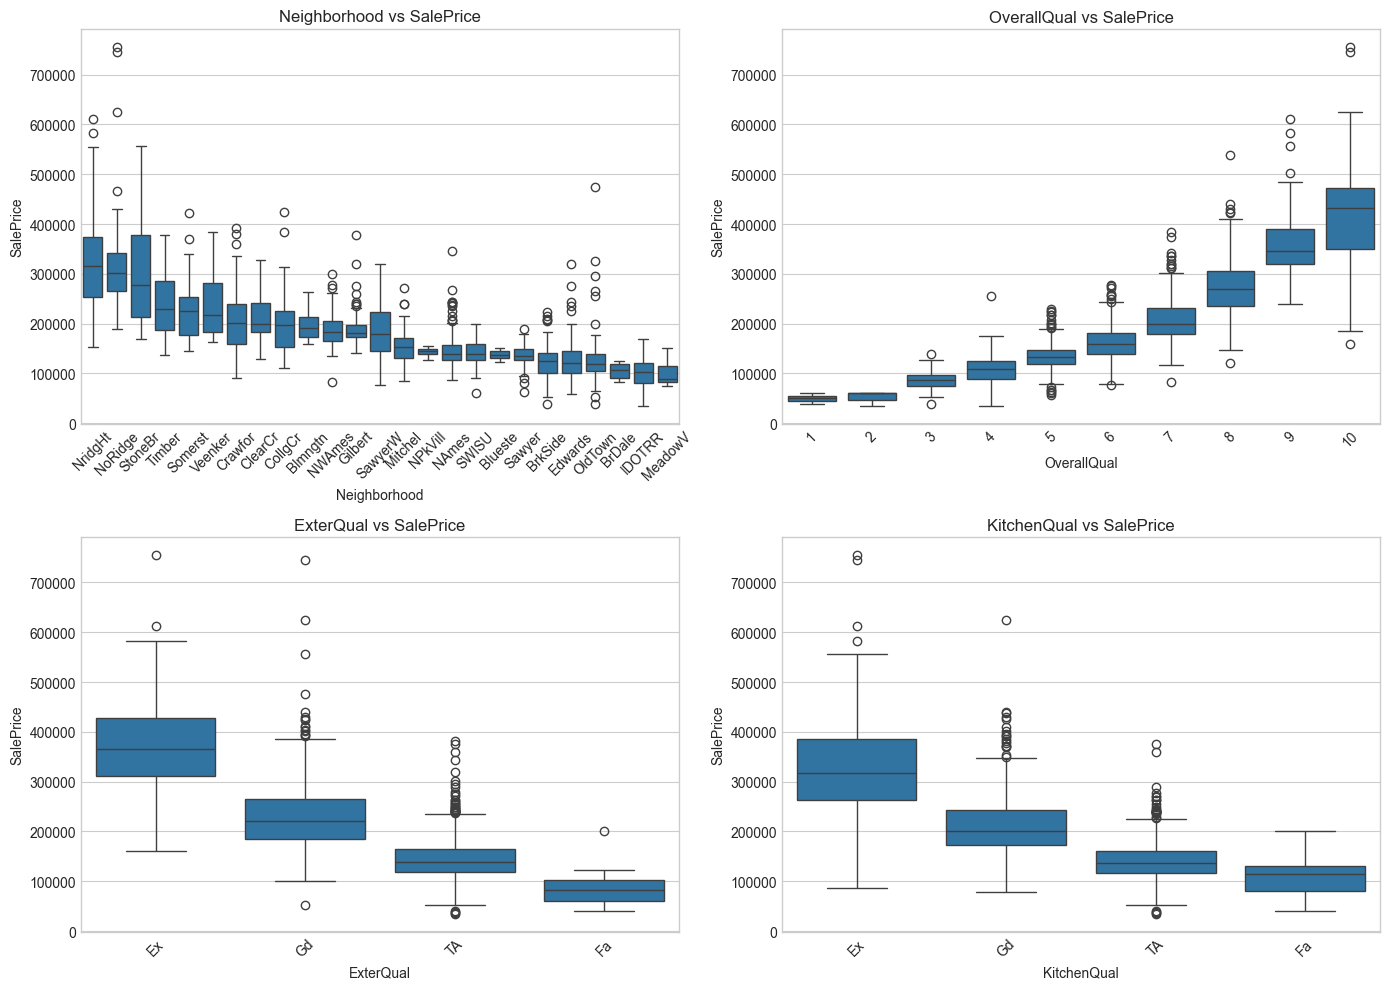

In [13]:
# Analisis beberapa fitur kategorikal penting
important_cats = ['Neighborhood', 'OverallQual', 'ExterQual', 'KitchenQual']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(important_cats):
    if col in train_df.columns:
        if train_df[col].dtype == 'object':
            order = train_df.groupby(col)[TARGET_COL].median().sort_values(ascending=False).index
            sns.boxplot(data=train_df, x=col, y=TARGET_COL, order=order, ax=axes[i])
        else:
            sns.boxplot(data=train_df, x=col, y=TARGET_COL, ax=axes[i])
        axes[i].set_title(f'{col} vs SalePrice')
        axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.savefig('categorical_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# **5. Data Preprocessing**

## 5.1 Handling Missing Values

In [14]:
def handle_missing_values(df):
    """Handle missing values dalam dataset"""
    df = df.copy()
    
    # Numeric: fill with median
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].median(), inplace=True)
    
    # Categorical: fill with mode or 'None'
    cat_cols = df.select_dtypes(include=['object']).columns
    for col in cat_cols:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()
            df[col].fillna(mode_val[0] if len(mode_val) > 0 else 'None', inplace=True)
    
    return df

# Apply
train_processed = handle_missing_values(train_df)
print(f"Missing values setelah handling: {train_processed.isnull().sum().sum()}")

Missing values setelah handling: 0


## 5.2 Feature Engineering

In [15]:
def feature_engineering(df):
    """Create new features"""
    df = df.copy()
    
    # Total square footage
    if all(col in df.columns for col in ['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
        df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
    
    # Total bathrooms
    bath_cols = ['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath']
    if all(col in df.columns for col in bath_cols):
        df['TotalBath'] = df['FullBath'] + 0.5*df['HalfBath'] + df['BsmtFullBath'] + 0.5*df['BsmtHalfBath']
    
    # House age
    if 'YearBuilt' in df.columns and 'YrSold' in df.columns:
        df['HouseAge'] = df['YrSold'] - df['YearBuilt']
    
    # Remodel age
    if 'YearRemodAdd' in df.columns and 'YrSold' in df.columns:
        df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']
    
    return df

# Apply
train_processed = feature_engineering(train_processed)
new_features = ['TotalSF', 'TotalBath', 'HouseAge', 'RemodAge']
print(f"New features created: {[f for f in new_features if f in train_processed.columns]}")

New features created: ['TotalSF', 'TotalBath', 'HouseAge', 'RemodAge']


## 5.3 Encoding Kategorikal

In [16]:
def encode_categorical(df, label_encoders=None):
    """Encode categorical variables using LabelEncoder"""
    df = df.copy()
    cat_cols = df.select_dtypes(include=['object']).columns
    
    if label_encoders is None:
        label_encoders = {}
        for col in cat_cols:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    else:
        for col in cat_cols:
            if col in label_encoders:
                le = label_encoders[col]
                df[col] = df[col].astype(str).apply(
                    lambda x: le.transform([x])[0] if x in le.classes_ else -1
                )
    
    return df, label_encoders

# Separate target
y = train_processed[TARGET_COL].copy()
X = train_processed.drop(columns=[ID_COL, TARGET_COL])

# Apply encoding
X_encoded, encoders = encode_categorical(X)
print(f"Shape after encoding: {X_encoded.shape}")
print(f"All numeric now: {X_encoded.select_dtypes(include=['object']).shape[1] == 0}")

Shape after encoding: (1460, 83)
All numeric now: True


## 5.4 Train/Validation Split

In [17]:
# Split data
TEST_SIZE = 0.2
RANDOM_STATE = 42

X_train, X_val, y_train, y_val = train_test_split(
    X_encoded, y, test_size=TEST_SIZE, random_state=RANDOM_STATE
)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

Training set: (1168, 83)
Validation set: (292, 83)


## 5.5 Feature Scaling

In [18]:
# Apply StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train), 
    columns=X_train.columns, 
    index=X_train.index
)
X_val_scaled = pd.DataFrame(
    scaler.transform(X_val), 
    columns=X_val.columns, 
    index=X_val.index
)

print("Scaling applied successfully!")
print(f"X_train_scaled mean: {X_train_scaled.mean().mean():.6f}")
print(f"X_train_scaled std: {X_train_scaled.std().mean():.6f}")

Scaling applied successfully!
X_train_scaled mean: 0.000000
X_train_scaled std: 1.000428


## 5.6 Save Preprocessed Data

In [19]:
# Save to CSV
import os
os.makedirs(PROCESSED_DIR, exist_ok=True)

X_train_scaled.to_csv(f"{PROCESSED_DIR}/X_train.csv", index=False)
X_val_scaled.to_csv(f"{PROCESSED_DIR}/X_val.csv", index=False)
y_train.to_csv(f"{PROCESSED_DIR}/y_train.csv", index=False)
y_val.to_csv(f"{PROCESSED_DIR}/y_val.csv", index=False)

# Save metadata
metadata = {
    'feature_cols': X_train_scaled.columns.tolist(),
    'n_train': len(X_train_scaled),
    'n_val': len(X_val_scaled),
    'n_features': len(X_train_scaled.columns)
}

with open(f"{PROCESSED_DIR}/metadata.json", 'w') as f:
    json.dump(metadata, f, indent=2)

print("="*50)
print("PREPROCESSING COMPLETE!")
print("="*50)
print(f"Files saved to: {PROCESSED_DIR}/")
print(f"Train samples: {metadata['n_train']}")
print(f"Val samples: {metadata['n_val']}")
print(f"Features: {metadata['n_features']}")

PREPROCESSING COMPLETE!
Files saved to: ../house_prices_preprocessing/
Train samples: 1168
Val samples: 292
Features: 83



# **Ringkasan Preprocessing**

| Step | Deskripsi | Hasil |
|------|-----------|-------|
| 1 | Handle Missing Values | Numeric: median, Categorical: mode |
| 2 | Feature Engineering | 4 fitur baru (TotalSF, TotalBath, HouseAge, RemodAge) |
| 3 | Encoding | Label Encoding untuk 43 kolom kategorikal |
| 4 | Train/Val Split | 80/20 split (1168/292 samples) |
| 5 | Scaling | StandardScaler (mean=0, std=1) |